<a href="https://colab.research.google.com/github/IvanYau88/hello-world/blob/main/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
class BostonHousingDataset:
    def __init__(self):
        self.url = "http://lib.stat.cmu.edu/datasets/boston"
        self.feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

    def load_dataset(self):
        # Fetch data from URL
        raw_df = pd.read_csv(self.url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

        # Create the dictionary in sklearn format
        dataset = {
            'data': [],
            'target': [],
            'feature_names': self.feature_names,
            'DESCR': 'Boston House Prices dataset'
        }

        dataset['data'] = data
        dataset['target'] = target

        return dataset

In [28]:
# Load the Boston Housing Dataset from sklearn
boston_housing = BostonHousingDataset()
boston_dataset = boston_housing.load_dataset()
boston_dataset.keys(), boston_dataset['DESCR']

(dict_keys(['data', 'target', 'feature_names', 'DESCR']),
 'Boston House Prices dataset')

In [29]:
# Create the dataset
boston = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
boston['MEDV'] = boston_dataset['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
from sklearn.model_selection import train_test_split
X = boston.to_numpy()
X = np.delete(X, 13, 1)
y = boston['MEDV'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = 0
        self.b = 0

    def predict(self, X):
        return self.w * X + self.b

    def mse_loss(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def mae_loss(self, y_pred, y):
        return np.mean(np.abs(y_pred - y))

    def fit(self, X, y):
        m = len(y)
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            dw = -(2/m) * np.sum(X * (y - y_pred))
            db = -(2/m) * np.sum(y - y_pred)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return self.mse_loss(y_pred, y), self.mae_loss(y_pred, y)


In [108]:
# Train the model
lr_scratch = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lr_scratch.fit(X_train, y_train)
mse, mae = lr_scratch.evaluate(X_test, y_test)

ValueError: operands could not be broadcast together with shapes (404,) (404,13) 

In [51]:
# Compare with sklearn
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)
sklearn_mse = np.mean((y_pred_sklearn - y_test) ** 2)
sklearn_mae = np.mean(np.abs(y_pred_sklearn - y_test))

In [84]:
print(f"Scratch MSE: {mse}, Scratch MAE: {mae}")
print(f"Sklearn MSE: {sklearn_mse}, Sklearn MAE: {sklearn_mae}")

NameError: name 'mse' is not defined

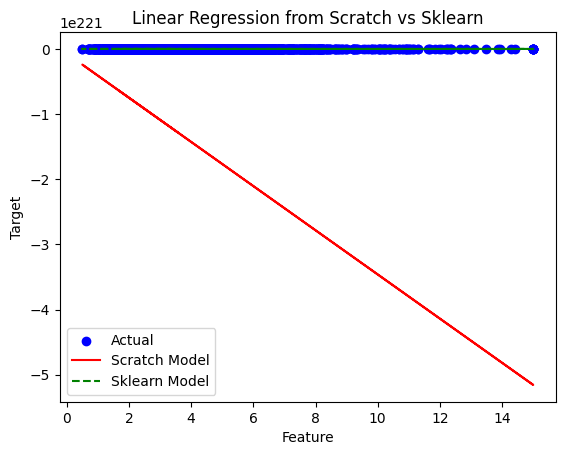

In [92]:
# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, lr_scratch.predict(X_test), color='red', label='Scratch Model')
plt.plot(X_test, y_pred_sklearn, color='green', linestyle='dashed', label='Sklearn Model')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression from Scratch vs Sklearn')
plt.show()